# <div style="color: coral">[Projet] Paris "Smart City"</div>

# Présentation du projet

## <div style="color: blue">1. Contexte</div>

<div class="alert alert-block alert-warning">
    <b><u>Objectif</u></b><br>
    
Contribuer à <b>l'optimisation des tournées</b> pour l'entretien des arbres de la ville, à travers une <b>analyse exploratoire</b> d'un <a href="https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=13,48.86844,2.30945&basemap=jawg.streets">jeu de données Open Data</a>, dont la synthèse devra être <b>compréhensible pour un public non spécialiste</b>
</div>

## <div id="ch0" style="color: blue">2. Méthodologie</div>

La présente étude utilise Python et les bibliothèques Numpy, Pandas, MatPlotLib, Seaborn, Missingno et SciPy.

Etapes de la méthodologie :
1. [Import et description du jeu de données (dataset)](#ch1)
2. [Nettoyage du dataset](#ch2)
3. [Analyse du dataset](#ch3)
4. [Préconisations dans le cadre du projet "Paris Smart City"](#ch4)

# Réalisation du projet

## <div id="ch1" style="color: blue">1. Import et description du jeu de données</div>

### <span style="color: green">1.1 Import</span>

- Le dataset a été [téléchargé](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+2+Participez+%C3%A0+un+concours+sur+la+Smart+City/p2-arbres-fr.csv) et installé dans le répertoire du projet
- Import des biliothèques que nous utiliserons au cours de ce projet
- Chargement du dataset dans un DataFrame Pandas

In [1]:
# Imports des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Chargement du dataset
data = pd.read_csv('p2-arbres-fr.csv', sep=";")

### <span style="color: green">1.2 Forme des données</span>

In [2]:
print()
print(f"Forme des données (lignes, colonnes) : {data.shape}")
print('--------------------------------------')
print()
print(f"Nombre d'éléments : {data.size}")
print('-------------------')
print()
print('Types des données :')
print('-------------------')
print(data.dtypes)
print()
print('Premières lignes du DataFrame :')
print('-------------------------------')
data.head()


Forme des données (lignes, colonnes) : (200137, 18)
--------------------------------------

Nombre d'éléments : 3602466
-------------------

Types des données :
-------------------
id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Premières lignes du DataFrame :
-------------------------------


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [3]:
print()
print(f"Toutes les valeurs du champ `id` sont-elles uniques ? : {len(data['id'].unique()) == len(data)}")
print('-------------------------------------------------------')
print()


Toutes les valeurs du champ `id` sont-elles uniques ? : True
-------------------------------------------------------



<div class="alert alert-block alert-warning">
    <b><u>Forme des données</u></b><br>

- Le dataset est constitué de 200.137 individus
- Le champ `id` contient un identificateur unique de chaque individu, il peut être donc utilisé en tant qu'index du DataFrame
- Le champ `type_emplacement` est inutile : il indique la même valeur à travers tout le dataset ("arbre")
    
</div>

Remédions aux observations :

In [4]:
# Créons une copie du dataset
copy = data.copy()

# Nous supprimons la colonne 'type_emplacement'
copy.drop(labels='type_emplacement', axis=1, inplace=True)

# Nous remplaçons les index génériques par les nombres de la colonne 'id'
copy.set_index('id', inplace=True)

# Nouvelle forme du dataset
copy.shape

(200137, 16)

[*(Retour sommaire)*](#ch0)

## <div id="ch2" style="color: blue">2. Nettoyage du jeu de données</div>

### <span style="color: green">2.1 Valeurs manquantes</span>


Graphique des valeurs manquantes :
----------------------------------


<AxesSubplot:>

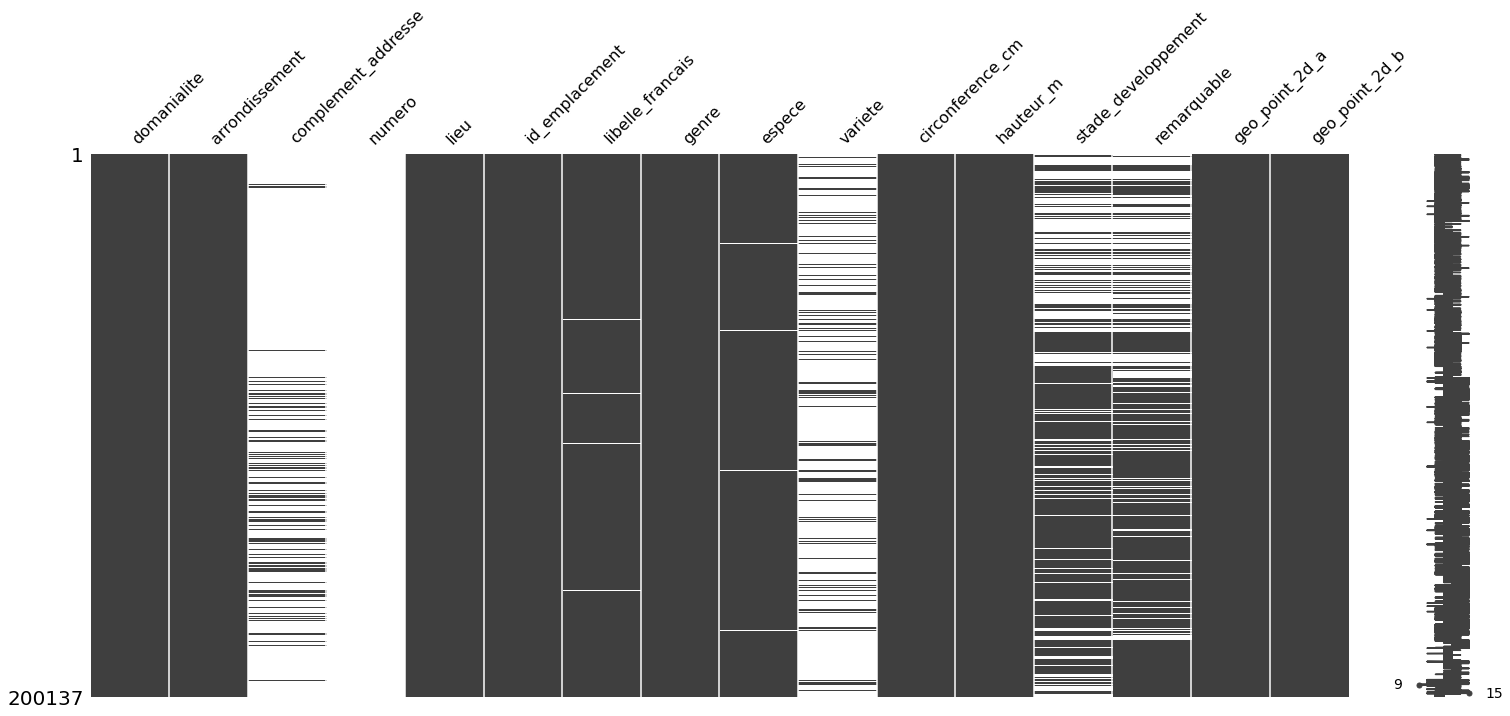

In [5]:
print()
print('Graphique des valeurs manquantes :')
print('----------------------------------')
msno.matrix(copy)

In [6]:
print()
print('Compte des valeurs manquantes :')
print('-------------------------------')
copy.isnull().sum()


Compte des valeurs manquantes :
-------------------------------


domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

Peut-on récupérer les valeurs manquantes de `libelle_francais` et `genre` ?

In [7]:
print()
print(f"Valeurs uniques de 'libelle_francais' : {len(copy.loc[:, 'libelle_francais'].dropna().unique())}")
print('---------------------------------------')
print()
print(f"Valeurs uniques de 'genre' : {len(copy.loc[:, 'genre'].dropna().unique())}")
print('----------------------------')
print()


Valeurs uniques de 'libelle_francais' : 192
---------------------------------------

Valeurs uniques de 'genre' : 175
----------------------------



Les ensembles en correspondent pas

In [8]:
print()
print("Est-il possible de récupérer les genres manquants à l'aide du libelle_francais ?")
print('--------------------------------------------------------------------------------')
copy.loc[copy['genre'].isnull(), ['genre', 'libelle_francais']]


Est-il possible de récupérer les genres manquants à l'aide du libelle_francais ?
--------------------------------------------------------------------------------


,genre,libelle_francais
id,,
2018848,NaN,NaN
2018853,NaN,NaN
2018854,NaN,NaN
2018919,NaN,NaN
2018920,NaN,NaN
2018932,NaN,NaN
2018942,NaN,NaN
2018943,NaN,NaN
2018945,NaN,NaN


<div class="alert alert-block alert-warning">
    <b><u>Valeurs manquantes</u></b><br>
    
- Le champ `numéro` ne contenant aucune valeur, nous pouvons le supprimer
- Les champs `complement_adresse`, `variete`, `stade_developpement` et `remarquable` étant accessoires mais informatifs, nous les laisserons tels quels malgré le nombre important de valeurs manquantes 
- Comme il n'y a pas de bijection entre `libelle_francais` et `genre`, il ne sera pas possible de récupérer les libellés manquants
- Comme les `libelles_francais` manquent lorsque les `genre` manquent, il ne sera pas possible de récupérer les genres manquants
    
</div>

Remédions aux observations :

In [9]:
# Suppression de la colonne 'numéro'
copy.drop(labels='numero', axis=1, inplace=True)
copy.shape

(200137, 15)

### <span style="color: green">2.2 Format de données</span>

In [10]:
print()
print('Valeurs uniques raisonnablement dénombrables :')
print('----------------------------------------------')
for c in ['domanialite', 'arrondissement', 'stade_developpement', 'libelle_francais', 'genre']:
    print(c.upper())
    print()
    print(copy[c].dropna().sort_values().unique())
    print()
    print('+++++++++++++++++++')
    print()


Valeurs uniques raisonnablement dénombrables :
----------------------------------------------
DOMANIALITE

['Alignement' 'CIMETIERE' 'DAC' 'DASCO' 'DASES' 'DFPE' 'DJS' 'Jardin'
 'PERIPHERIQUE']

+++++++++++++++++++

ARRONDISSEMENT

['BOIS DE BOULOGNE' 'BOIS DE VINCENNES' 'HAUTS-DE-SEINE' 'PARIS 10E ARRDT'
 'PARIS 11E ARRDT' 'PARIS 12E ARRDT' 'PARIS 13E ARRDT' 'PARIS 14E ARRDT'
 'PARIS 15E ARRDT' 'PARIS 16E ARRDT' 'PARIS 17E ARRDT' 'PARIS 18E ARRDT'
 'PARIS 19E ARRDT' 'PARIS 1ER ARRDT' 'PARIS 20E ARRDT' 'PARIS 2E ARRDT'
 'PARIS 3E ARRDT' 'PARIS 4E ARRDT' 'PARIS 5E ARRDT' 'PARIS 6E ARRDT'
 'PARIS 7E ARRDT' 'PARIS 8E ARRDT' 'PARIS 9E ARRDT' 'SEINE-SAINT-DENIS'
 'VAL-DE-MARNE']

+++++++++++++++++++

STADE_DEVELOPPEMENT

['A' 'J' 'JA' 'M']

+++++++++++++++++++

LIBELLE_FRANCAIS

['Abelia' 'Abricotier' 'Ailante' 'Alangium' 'Alisier' 'Althéa' 'Amandier'
 'Amla' 'Amélanchier' 'Andromède' 'Angélique' 'Araucaria' 'Arbousier'
 'Arbre aux mouchoirs' 'Arbre aux quarante écus' 'Arbre de Judée'
 'Ar

In [11]:
print()
print('Premières observations statistiques :')
print('------------------------------------')
copy.describe(include='all')


Premières observations statistiques :
------------------------------------


,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,200136,200137,30902,200137,200137,198640,200121,198385,36777,200137.000000,200137.000000,132932,137039.000000,200137.000000,200137.000000
unique,9,25,3795,6921,69040,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN
top,Alignement,PARIS 15E ARRDT,SN°,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN
freq,104949,17151,557,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.380479,13.110509,NaN,0.001343,48.854491,2.348208
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.190213,1971.217387,NaN,0.036618,0.030234,0.051220
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,48.742290,2.210241
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,0.000000,48.835021,2.307530
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,0.000000,48.854162,2.351095
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,0.000000,48.876447,2.386838


<div class="alert alert-block alert-warning">
    <b><u>Format</u></b><br>
    
- On note une différence de format dans le champ `id_emplacement` qui ne peut cependant pas être résolue sans l'aide d'un spécialiste du domaine : nous ne nous baserons pas sur ce champ pour l'analyse
- Les valeur extrêmes de `hauteur_m` et `circonférence_cm` que nous observons dans le tableau ci-dessus nous mettent en alerte pour l'analyse des outliers à venir

</div>

### <span style="color: green">2.3 Doublons</span>

In [12]:
doublons = copy.loc[copy.duplicated(['geo_point_2d_a', 'geo_point_2d_b'], keep=False), :]
print()
print(f"Aperçu des lignes potentiellement en double ({len(doublons)} lignes) :")
print('------------------------------------------------------')
doublons


Aperçu des lignes potentiellement en double (22 lignes) :
------------------------------------------------------


,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
id,,,,,,,,,,,,,,,
112286,Jardin,PARIS 12E ARRDT,NaN,JARDIN PARTAGE BEL-AIR,5,Ailante,Ailanthus,altissima,NaN,0,0,NaN,NaN,48.838318,2.406610
112287,Jardin,PARIS 12E ARRDT,NaN,JARDIN PARTAGE BEL-AIR,6,Ailante,Ailanthus,altissima,NaN,0,0,NaN,NaN,48.838318,2.406610
115338,Jardin,PARIS 19E ARRDT,NaN,VOIE DF19,1,Peuplier,Populus,nigra,NaN,120,20,NaN,NaN,48.900332,2.386441
115339,Jardin,PARIS 19E ARRDT,NaN,VOIE DF19,2,Peuplier,Populus,nigra,NaN,100,20,NaN,NaN,48.900290,2.386442
115340,Jardin,PARIS 19E ARRDT,NaN,VOIE DF19,3,Peuplier,Populus,nigra,NaN,165,20,NaN,NaN,48.900253,2.386444
195525,PERIPHERIQUE,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19001,Peuplier,Populus,nigra,Italica',120,20,NaN,NaN,48.900332,2.386441
195526,PERIPHERIQUE,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19002,Peuplier,Populus,nigra,Italica',100,20,NaN,NaN,48.900290,2.386442
195527,PERIPHERIQUE,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19003,Peuplier,Populus,nigra,Italica',165,20,NaN,NaN,48.900253,2.386444
2006187,Alignement,BOIS DE VINCENNES,NaN,ROUTE DAUPHINE,402029,Tilleul,Tilia,platyphyllos,NaN,0,0,NaN,0.0,48.829912,2.439665


<div class="alert alert-block alert-warning">
    <b><u>Doublons</u></b><br>
    
Deux arbres ne pouvant en principe partager les mêmes coordonnées GPS, nous nous basons sur ces champs pour notre recherche de doublons.
    
Voici les différents types de doublons rencontrés et les mesures prises :

1. Arbres identiques avec des nomenclatures de `id_emplacement` différentes : nous garderons la description la plus précise
2. Enregistrements consécutifs à tort : nous garderons le premier enregistrement
3. Deux vagues d'enregistrement pour les mêmes arbres avec différents niveaux de précision : nous garderons les plus précis
4. Correction d'un enregistrement erroné : nous garderons l'enregistrement le plus récent (`id`le plus élevé)
5. Enregistrements contradictoires : nous garderons les deux
        
</div>

Remédions aux observations :

In [13]:
# Suppression des doublons
copy.drop(labels=[112287, 115338, 115339, 115340, 2006188, 2016378, 2016379, 2010572, 2011522, 2015806], axis=0, inplace=True)
copy.shape

(200127, 15)

### <span style="color: green">2.4 Valeurs aberrantes</span>

Comme vu lors de la description des données, les valeurs aberrantes se concentrent autour des valeurs de hauteur et de circonférence des arbres :
- Valeurs de hauteur à 0m, or les sujets plantés dans l'espace public sont des adultes ayant grandis en pépinière, il est peu probable de trouver des sujets ayant moins de 1m de hauteur
- Valeur de circonférence à 0cm, ce qui est de manière analogue impossible sur un sujet adulte
- Valeurs de hauteur et de circonférence dépassant les records français connus, donc très improbables

In [14]:
copy_len = len(copy)
print()
sans_hauteur = len(copy[copy['hauteur_m'] == 0])
print(f"Compte des valeurs à 0 pour la hauteur : {sans_hauteur} ({np.round((sans_hauteur/copy_len)*100, decimals=1)}%)")
print('----------------------------------------')
print()
sans_circonference = len(copy[copy['circonference_cm'] == 0])
print(f"Compte des valeurs à 0 pour la circonférence : {sans_circonference} ({np.round((sans_circonference/copy_len)*100, decimals=1)}%)")
print('----------------------------------------------')
print()
sans_mesure = len(copy[(copy['circonference_cm'] == 0) & (copy['hauteur_m'] == 0)])
print(f"Compte des valeurs à 0 pour la hauteur ET la circonférence : {sans_mesure} ({np.round((sans_mesure/copy_len)*100, decimals=1)}%)")
print('------------------------------------------------------------')


Compte des valeurs à 0 pour la hauteur : 39213 (19.6%)
----------------------------------------

Compte des valeurs à 0 pour la circonférence : 25861 (12.9%)
----------------------------------------------

Compte des valeurs à 0 pour la hauteur ET la circonférence : 25495 (12.7%)
------------------------------------------------------------


In [15]:
grandes_hauteurs = len(copy.loc[copy['hauteur_m'] > 67, ['hauteur_m']])
print()
print(f"Valeurs de hauteur supérieures à 67 mètres : {grandes_hauteurs} ({np.round((grandes_hauteurs/copy_len)*100, decimals=2)}%)")
print('--------------------------------------------')
grandes_circonferences = len(copy.loc[copy['circonference_cm'] > 630, ['circonference_cm']])
print()
print(f"Valeurs de circonférence supérieures à 1389cm (tronc de 4,42m de diamètre) : {grandes_circonferences} ({np.round((grandes_circonferences/copy_len)*100, decimals=2)}%)")
print('----------------------------------------------------------------------------')
print()


Valeurs de hauteur supérieures à 67 mètres : 352 (0.18%)
--------------------------------------------

Valeurs de circonférence supérieures à 1389cm (tronc de 4,42m de diamètre) : 93 (0.05%)
----------------------------------------------------------------------------



<div class="alert alert-block alert-warning">
    <b><u>Valeurs aberrantes</u></b><br>

- La `circonference_cm` et la `hauteur_m` possèdent de très nombreuses valeurs nulles : nous placerons ces valeurs en NaN afin qu'elles ne perturbent pas l'analyse
- Une [recherche des valeurs extrêmes de proportion des arbres en France et dans le monde](https://www.monumentaltrees.com/fr/records/) indique que plusieurs valeurs parmis les plus élevées de `hauteur_m` et `circonference_cm` sont bien au-delà de celles possibles : nous les traiterons en NaN, comme pour les valeur nulles

</div>

<div class="alert alert-block alert-info">
    <b><u>Remarque</u></b><br>

Une analyse plus précise pourrait identifier les valeurs maximum par espèce d'arbre, mais cela demanderait beaucoup plus de temps

</div>

Remédions aux observations :

In [16]:
# Mise à NaN des valeurs nulles
copy.loc[copy['hauteur_m'] == 0, 'hauteur_m'] = np.nan
copy.loc[copy['circonference_cm'] == 0, 'circonference_cm'] = np.nan

# Mise à NaN des valeurs maximum trop élevées
copy.loc[copy['hauteur_m'] > 67, 'hauteur_m'] = np.nan
copy.loc[copy['circonference_cm'] > 1389, 'circonference_cm'] = np.nan

### <span style="color: green">2.5 Outliers</span>

Des outliers ont survécu à l'analyse des valeurs aberrantes.
Il convient de les analyser et les traiter.<br>
Nous allons pour cela étudier la répartition des valeurs ainsi que plusieurs indicateurs statistiques.

#### 2.5.1 Répartition, Z-score et médiane

Le Z-score permet d'étudier des classes de valeurs centrées et réduites.
La formule utilisée ici est $\frac{x - \bar{x}}{\sigma}$<br>
$x$ : valeur<br>
$\bar{x}$ : moyenne des valeurs<br>
$\sigma$ : écart-type

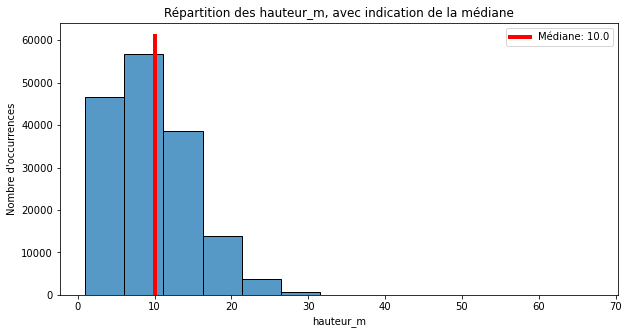


Regroupement des hauteur_m par Z-score :
----------------------------------------
              Nombre_occurrences  Seuil_hauteur_m_z_score
z_score                                                  
(-2.0, -1.0]               36039                      1.0
(-1.0, 0.0]                64311                      6.0
(0.0, 1.0]                 38219                     11.0
(1.0, 2.0]                 17330                     16.0
(2.0, 3.0]                  3773                     22.0
(3.0, 4.0]                   684                     27.0
(4.0, 5.0]                    49                     32.0
(5.0, 6.0]                    29                     37.0
(6.0, 7.0]                    22                     43.0
(7.0, 8.0]                    14                     50.0
(8.0, 9.0]                    32                     54.0
(9.0, 10.0]                   24                     59.0



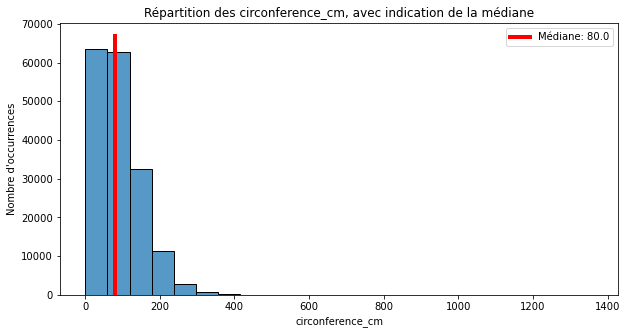


Regroupement des circonference_cm par Z-score :
----------------------------------------
              Nombre_occurrences  Seuil_circonference_cm_z_score
z_score                                                         
(-2.0, -1.0]               25437                             1.0
(-1.0, 0.0]                76766                            31.0
(0.0, 1.0]                 47010                            92.0
(1.0, 2.0]                 18147                           153.0
(2.0, 3.0]                  5321                           215.0
(3.0, 4.0]                  1055                           276.0
(4.0, 5.0]                   272                           337.0
(5.0, 6.0]                    88                           398.0
(6.0, 7.0]                    44                           460.0
(7.0, 8.0]                    25                           525.0
(8.0, 9.0]                     9                           585.0
(9.0, 10.0]                   10                           645.0


In [17]:
print()
for colonne in ['hauteur_m', 'circonference_cm']:
    
    # Récupération d'un subset
    stats = copy[[colonne]].dropna()

    # Calcul du Z-score
    moyenne = stats[colonne].mean()
    ecart_type = stats[colonne].std()
    stats['z_score'] = (stats[colonne] - moyenne) / ecart_type

    # Répartition des hauteurs en classes de n*(z-score)
    z_score_min = np.floor(stats['z_score'].min())
    z_score_max = np.ceil(stats['z_score'].max())
    bins = np.arange(z_score_min, z_score_max, 1)

    # Calcul de la médiane
    intervalle = (stats[colonne].max() - stats[colonne].min()) / len(bins)
    mediane = np.round(np.quantile(stats[colonne], 0.5), 3)
    mediane_effectif = len(stats[(stats[colonne] >= mediane - (intervalle / 2)) & (stats[colonne] < mediane + (intervalle / 2))])
    
    # Affichage de la figure
    plt.figure(figsize=(10, 5))
    distribution_z = sns.histplot(stats[colonne], bins=len(bins))
    distribution_z.set(
        title=f"Répartition des {colonne}, avec indication de la médiane",
        xlabel=f"{colonne}",
        ylabel="Nombre d'occurrences")
    plt.plot(
        np.full((2), mediane),
        [0, mediane_effectif],  
        'red',
        linewidth=4,
        label=f"Médiane: {mediane}"
    )
    plt.legend()
    plt.show()
    
    # Affichage de la table correspondante
    classes = pd.cut(stats['z_score'], bins)
    table_z = stats.groupby(classes)[colonne].agg(['count', 'min'])
    table_z.rename(columns={'count': 'Nombre_occurrences', 'min': f"Seuil_{colonne}_z_score"}, inplace=True)
    print()
    print(f"Regroupement des {colonne} par Z-score :")
    print('----------------------------------------')
    print(table_z)
    print()

#### 2.5.2 Quantiles

Les quantiles sont étudiés graphiquement à travers des boîtes à moustaches.

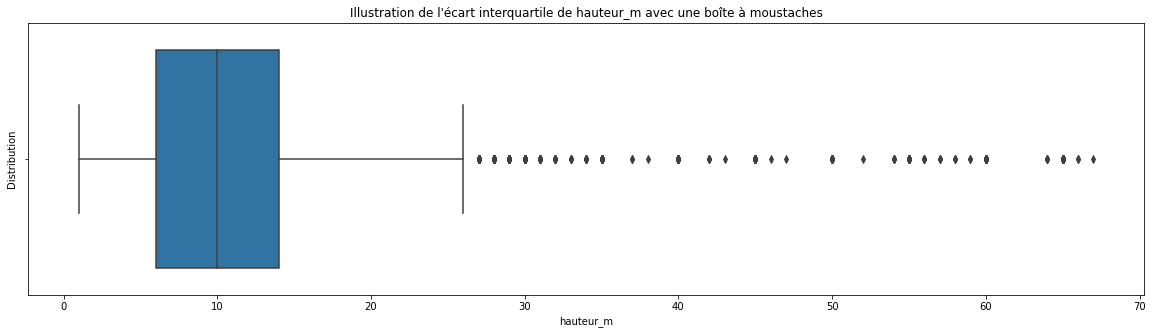

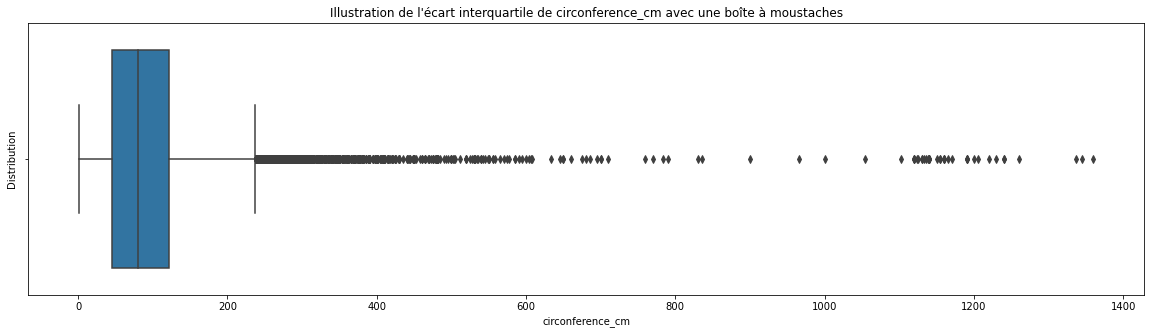

In [18]:
for colonne in ['hauteur_m', 'circonference_cm']:
    
    # Récupération d'un subset
    stats = copy[[colonne]].dropna()
    
    # Affichage de la figure
    plt.figure(figsize=(20, 5))
    eiq = sns.boxplot(data=stats[[colonne]], orient='h')
    eiq.set(
        title=f"Illustration de l'écart interquartile de {colonne} avec une boîte à moustaches",
        xlabel=f"{colonne}",
        ylabel="Distribution",
        yticklabels=[])
    plt.show()

<div class="alert alert-block alert-warning">
    <b><u>Répartition, Z-score et médiane</u></b><br>

- L'analyse univariée ne permet pas de tirer des conclusions claires
- Après recherches sur la relation entre circonférence et hauteur (voir [cet article rédigé par 3 chercheurs japonais dans la revue *Tree Physiology*](https://academic.oup.com/treephys/article/33/1/106/1729199?login=false) et [ce rapport publié par la Colombie Britanique](https://www2.gov.bc.ca/assets/gov/farming-natural-resources-and-industry/forestry/timber-pricing/timber-cruising/cruise-compilation-manual/cruise_comp_ch7.pdf), il semble que bien qu'une corrélation puisse être établie entre ces deux variables, leur relation est complexe et soumise à de nombreux paramètres, dont l'espèce n'en est qu'un des représentants
- Nous allons cependant tenter d'étudier les valeurs extrêmes par une approche polynomiale, en fixant des coefficients de manière arbitraire

</div>

#### 2.5.3 Analyse multivariée

Vérifions la corrélation de nos deux dimensions :


L'hypothèse de corrélation entre hauteur et circonférence semble vérifiée :
---------------------------------------------------------------------------


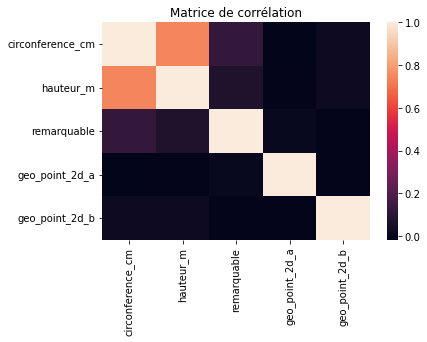

In [19]:
print()
print("L'hypothèse de corrélation entre hauteur et circonférence semble vérifiée :")
print('---------------------------------------------------------------------------')
sns.heatmap(copy.corr())
plt.title('Matrice de corrélation')
plt.show()

Vérifions la concentration conjointe :


Représentation de la distribution multivariée via l'estimation par noyau sur un échantillon :
---------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Estimation par noyau (échantillon de 10.000 valeurs)')

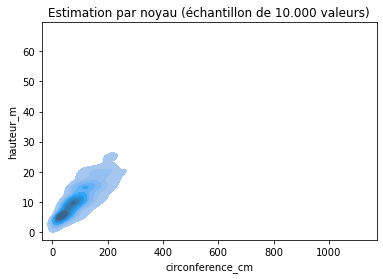

In [20]:
print()
print("Représentation de la distribution multivariée via l'estimation par noyau sur un échantillon :")
print("---------------------------------------------------------------------------------------------")
samp = copy.sample(10000)
sns.kdeplot(x=samp['circonference_cm'], y=samp['hauteur_m'], fill=True)
plt.title('Estimation par noyau (échantillon de 10.000 valeurs)')

La relation entre H (*height*, hauteur) et DBH (*Diameter at Breast Height*, le diamètre mesuré à une hauteur d'environs 1,20m) pour un arbre étant par une relation polynomiale ou exponentielle, nous prenons ici le parti d'encadrer les valeurs identifiées comme régulières par des équations polynomiales où H est représenté par $y$, et DBH par $x$ :
- L'équation de la courbe isolant les circonférences suspectes d'abord, fixée à $y = 0,001x² - x$ afin de couper l'axe des abscisses à 1000cm de circonférence
- En conservant le même coefficient canonique, nous modifions la seconde moitié de l'équation afin qu'elle isole les hauteurs supérieurs à 30m potentiellement suspectes : $y = 0,001x² + 30$


Encadrement de la distribution par des paraboles à coefficient canonique fixé :
-------------------------------------------------------------------------------


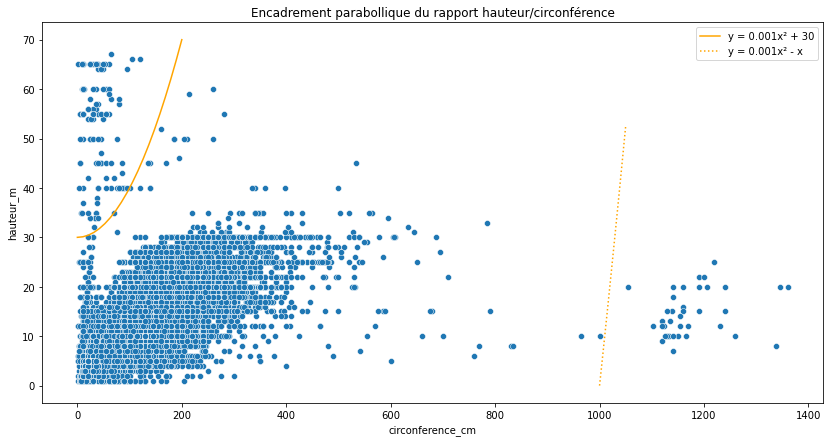

In [21]:
print()
print("Encadrement de la distribution par des paraboles à coefficient canonique fixé :")
print("-------------------------------------------------------------------------------")

# Nuage de point des valeurs des séries
plt.figure(figsize=(14, 7))
sns.scatterplot(x=copy['circonference_cm'], y=copy['hauteur_m'])

# Mise en lumière des valeurs à rapport hauteur / circonférence élevé
x_up = np.linspace(0, 200, 20)
y_up = 0.001*(x_up**2) + 30
sns.lineplot(x=x_up, y=y_up, color='orange', label="y = 0.001x² + 30")

# Mise en lumière des valeurs à rapport circonférence / hauteur élevé
x_down = np.linspace(1000, 1050, 20)
y_down = 0.001*(x_down**2) - x_down
sns.lineplot(x=x_down, y=y_down, ls=':', color='orange', label="y = 0.001x² - x")

# Affichage de la figure
plt.legend()
plt.title('Encadrement parabollique du rapport hauteur/circonférence')
plt.show()

Affichons les valeurs considérées comme suspectes :

In [22]:
print()
print("Mise en lumière des valeurs suspectes :")
print('---------------------------------------')

# Séparation des valeurs suspectes des autres
masque_suspect = (copy['hauteur_m'] >= 0.001*(copy['circonference_cm']**2) + 30) | (copy['hauteur_m'] <= 0.001*(copy['circonference_cm']**2) - copy['circonference_cm'])
suspect = copy.loc[masque_suspect, ['hauteur_m', 'circonference_cm', 'genre']].dropna()

# Affichage de la table des valeurs suspectes, avec mention du genre latin
suspect['diametre_cm'] = suspect['circonference_cm'] / np.pi
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(suspect.sort_values(by='hauteur_m', ascending=False).to_string())


Mise en lumière des valeurs suspectes :
---------------------------------------
         hauteur_m  circonference_cm          genre  diametre_cm
id                                                              
156324        67.0              65.0       Fraxinus       20.690
217488        66.0             104.0       Platanus       33.104
2001989       66.0             120.0         Prunus       38.197
236132        65.0              25.0          Tilia        7.958
2008723       65.0              10.0         Celtis        3.183
2008714       65.0              10.0         Celtis        3.183
2008712       65.0              10.0         Celtis        3.183
255166        65.0              53.0       Platanus       16.870
2008749       65.0              10.0         Celtis        3.183
186019        65.0              25.0          Pyrus        7.958
240099        65.0               8.0       Fraxinus        2.546
2008729       65.0              10.0         Celtis        3.183
2008744  

<div class="alert alert-block alert-warning">
    <b><u>Etude bivariée</u></b><br>

- En fixant les coefficients de nos équation polynomiale autour des points de rutpure identifiés lors de l'analyse univariée, nous pouvons ici isoler des rapport hauteur/circonférence intéressants
- Sans aide d'un spécialiste, il n'est toujours pas aisé de fixer une limite, mais intuitivement nous sentons qu'un arbre de 65 mètre ne peut pas avoir un tronc d'un diamètre de 3 centimètres.
- Parmis les valeurs isolées, nous allons donc mettre à NaN la `hauteur_m` lorsque sa valeur sera supérieure à celle de `circonference_cm` (rapport hauteur/circonférence de 100/1), et la `circonférence_cm` lorsque sa valeur convertie en mètre dépasse la valeur de la hauteur (rapport hauteur/circonférence de 1/1)

</div>

Remédions aux observations :

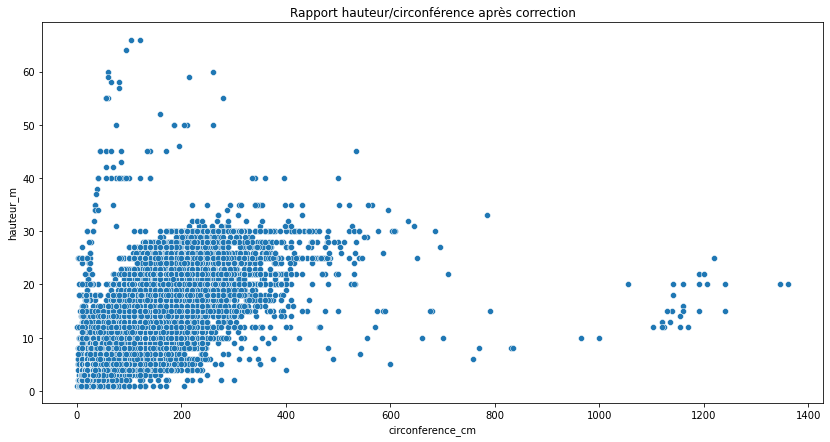

In [23]:
# Suppression des valeurs jugées aberrantes
masque_hauteur = (copy['hauteur_m'] >= 0.001*(copy['circonference_cm']**2) + 30) & (copy['hauteur_m'] > copy['circonference_cm'])
copy.loc[masque_hauteur, ['hauteur_m']] = np.nan
masque_circonference = (copy['hauteur_m'] <= 0.001*(copy['circonference_cm']**2) - copy['circonference_cm']) & (copy['hauteur_m'] < copy['circonference_cm'] / 100)
copy.loc[masque_circonference, ['circonference_cm']] = np.nan

# Affichage de la répartition finale de nos valeurs
plt.figure(figsize=(14, 7))
sns.scatterplot(x=copy['circonference_cm'], y=copy['hauteur_m'])
plt.title('Rapport hauteur/circonférence après correction')
plt.show()

[*(Retour sommaire)*](#ch0)

## <div id="ch3" style="color: blue">3. Analyse</div>

In [24]:
copy.describe(include='all')

,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,200126,200127,30902,200127,200127,198630,200111,198375,36777,174220.000000,160465.000000,132931,137033.000000,200127.000000,200127.000000
unique,9,25,3795,6921,69039,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN
top,Alignement,PARIS 15E ARRDT,SN°,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN
freq,104948,17151,557,2990,1324,42507,42590,36408,4538,NaN,NaN,64437,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.648772,10.370691,NaN,0.001343,48.854491,2.348204
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.588115,5.187888,NaN,0.036619,0.030234,0.051218
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,48.742290,2.210241
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,6.000000,NaN,0.000000,48.835021,2.307528
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,10.000000,NaN,0.000000,48.854164,2.351093
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.000000,14.000000,NaN,0.000000,48.876447,2.386827


Que pouvons-nous faire ?<br>
Nous remarquons que les données peuvent se regrouper en 2 grands ensembles :
- Celles relatives au lieu d'implantation des arbres
- Celles relative aux caractéristiques propres des arbre

Nous allons extraire des informations issues de ces deux groupes afin d'émettre des préconisations.

### <span style="color: green">3.1 Par arrondissements</span>

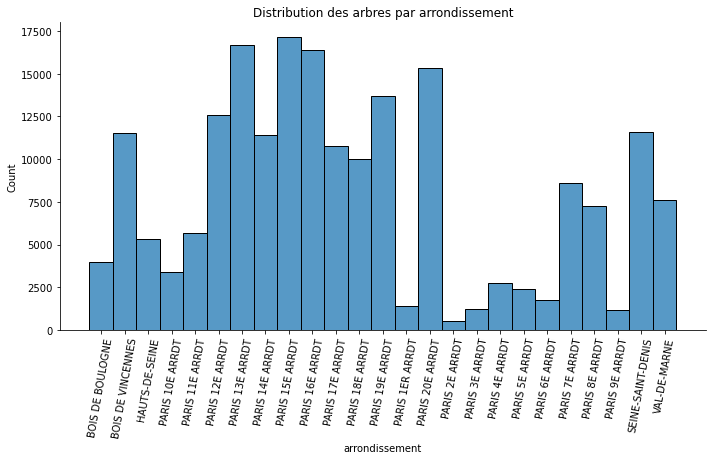

In [25]:
sns.displot(x='arrondissement', data=copy.sort_values('arrondissement'), aspect=2).set_xticklabels(rotation=80)
plt.title("Distribution des arbres par arrondissement")
plt.show()

<img src="arrondissements-paris.jpg" style="height: 400px;"/>

<div class="alert alert-block alert-warning">
    <b><u>Répartition par arrondissements</u></b><br>

- On remarque sur la distribution par arrondissements une disparité, entre d'une part les arrondissements ayant plus de 10.000 arbres sur leur circonscription, et ceux ayant moins de 3.000 arbres
- En observant une carte des arrondissements de Paris, on constate qu'il serait possible de mutualiser les efforts de maintenance sur des arrondissements connexes en créant les regroupements suivants : du 1er au 6ème arrondissement, du 9ème au 11ème arrondissement
- De cette manière, les véhicules d'entretien pourraient être mutualisés au sein de ces regroupements, de même que les tournées, et le volume d'arbres à entretenir deviendrait similaire à celui des autres arrondissements, c'est-à-dire autour de 10.000 arbres

</div>

In [26]:
arr1 = ['PARIS 1ER ARRDT']
arr2 = [f"PARIS {i}E ARRDT" for i in range(2, 7)]
arr9 = [f"PARIS {i}E ARRDT" for i in range(9, 12)]
arrondissements_1_6 = np.concatenate((arr1, arr2), axis=None) # Concaténation due au format ordinal de '1er'
nb_1_6 = len(copy.loc[copy['arrondissement'].isin(arrondissements_1_6)])
nb_9_11 = len(copy.loc[copy['arrondissement'].isin(arr9)])
print()
print(f"Nombre d'arbres du regroupement des arrondissements 1 à 6 : {nb_1_6}")
print('-----------------------------------------------------------')
print()
print(f"Nombre d'arbres du regroupement des arrondissements 9 à 11 : {nb_9_11}")
print('-----------------------------------------------------------')


Nombre d'arbres du regroupement des arrondissements 1 à 6 : 10042
-----------------------------------------------------------

Nombre d'arbres du regroupement des arrondissements 9 à 11 : 10210
-----------------------------------------------------------


### <span style="color: green">3.2 Par classes de hauteur</span>

Les méthodes d'entretien des arbres diffèrent selon leur hauteur et leur accessibilité :

- En-dessous de 10 mètres, il est possible d'utiliser des échelles sécurisées
<img src="echelle.jpg" style="height: 200px;"/>
- Jusqu'à 40 mètres, il est possible d'utilsier des [nacelles de type araignée](https://tracktor.fr/machines/2067-location-nacelle-araignee-40m-p65) (~3 tonnes)
<img src="nacelle_araignee.jpg" style="height: 200px;"/>
- Jusqu'à 58 mètres, il est possible d'utiliser des [nacelles téléscopiques](https://tracktor.fr/machines/2752-location-nacelle-telescopique-58m-p66) (~30 tonnes)
<img src="nacelle_telescopique.png" style="height: 200px;"/>
- Au-delà, il existe deux solutions : les [camions poids-lourd](https://tracktor.fr/guide/camion-nacelle-vl-ou-pl), et l'emploi de cordistes spécialisés

<div class='alert alert-block alert-warning'>

Cependant, il faut également considérer le fait que bon nombre d'arbres à Paris sont localisés dans des zones difficiles d'accès :
    
</div>

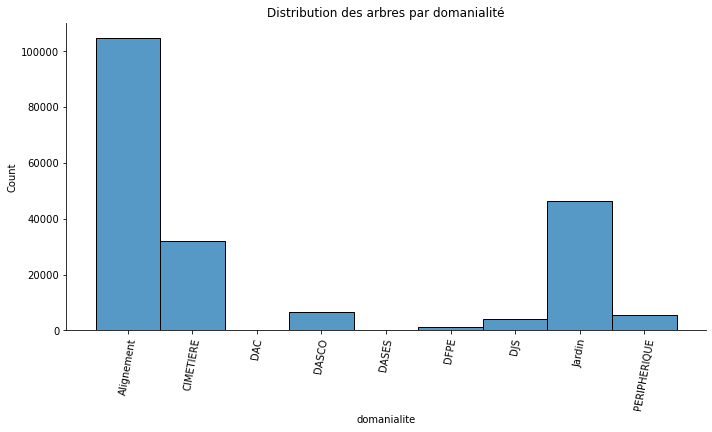

In [27]:
sns.displot(x='domanialite', data=copy.sort_values('domanialite'), aspect=2).set_xticklabels(rotation=80)
plt.title("Distribution des arbres par domanialité")
plt.show()

Regardons les mêmes données, en relation avec la taille des arbres :

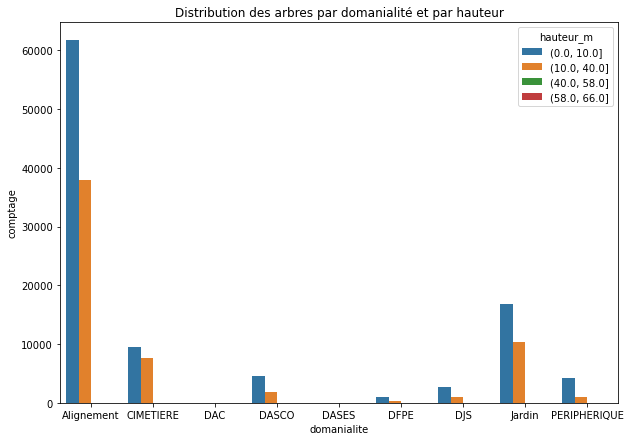

In [28]:
bins_hauteurs = [0, 10, 40, 58, copy['hauteur_m'].max()]
classes_hauteurs = pd.cut(copy['hauteur_m'], bins_hauteurs)
#subset = copy[(copy['domanialite'] == 'CIMETIERE') | (copy['domanialite'] == 'Jardin')]
table_hauteurs = copy.groupby(['domanialite', classes_hauteurs]).agg(comptage=('domanialite', 'count'))
table_hauteurs = table_hauteurs.reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='domanialite', y='comptage', hue='hauteur_m', data=table_hauteurs)
plt.title("Distribution des arbres par domanialité et par hauteur")
plt.show()

In [29]:
table_hauteurs

,domanialite,hauteur_m,comptage
0,Alignement,"(0.0, 10.0]",61695
1,Alignement,"(10.0, 40.0]",37936
2,Alignement,"(40.0, 58.0]",18
3,Alignement,"(58.0, 66.0]",5
4,CIMETIERE,"(0.0, 10.0]",9467
5,CIMETIERE,"(10.0, 40.0]",7553
6,CIMETIERE,"(40.0, 58.0]",4
7,CIMETIERE,"(58.0, 66.0]",1
8,DAC,"(0.0, 10.0]",12
9,DAC,"(10.0, 40.0]",9


Combien d'arbres de plus de 40m existe-t-il à Paris ?

In [30]:
print()
nb_sup_40 = len(copy[copy['hauteur_m'] >= 40])
prc_sup_40 = np.round((nb_sup_40 / len(copy)) * 100, 2)
print(f"Nombre d'arbres supérieurs à 40m de hauteur : {nb_sup_40} ({prc_sup_40}% du total)")
print('---------------------------------------------')


Nombre d'arbres supérieurs à 40m de hauteur : 63 (0.03% du total)
---------------------------------------------


<div class="alert alert-block alert-warning">
    <b><u>Répartition par classes de hauteur</u></b><br>

- On remarque sur la distribution par domanialités et par hauteur que les arbres sur lesquels nous devons porter notre attention sont ceux localisés dans les jardins et les cimetières : en effet les véhicules lourds ne peuvent y accéder facilement
- On remarque cependant que les arbres au-dessus de 40 mètres sont très peu nombreux, et que si on imagine un dispositif spécial pour les arbres plus au-dessus de 40 mètres de hauteur dans les cimetières et jardins (cordistes au lieu de poids-lourds), il peut être plus intéressant économiquement d'utiliser la même méthode pour l'ensemble des arbres de grande taille de la ville

</div>

[*(Retour sommaire)*](#ch0)

## <div id="ch4" style="color: blue">4. Préconisations</div>

Faisant directement suite à notre analyse, nous pouvons à présent émettre des préconisations comme autant de pistes d'optimisation.

### <span style="color: green">4.1 Préconisations générales</span>

<div class="alert alert-block alert-success">

**1. Séparer les tournées d'entretiens en 2 ensembles**
- D'une part les arbres d'une hauteur supérieure à 40m (63 spécimens), à effectuer par des cordistes spécialisés en une campagne d'entretien au global Paris
- D'autre part les autres arbres, dont l'entretien peut s'effectuer au moyen d'échelles sécurisées avec garde-corps (arbres dont la hauteur est inférieure à 10m), ou de nacelles de type "araignée" (entre 10m et 40m de hauteur)
- Cette séparation signifie un coût de la maintenance des grands arbres nettement diminuée au global Paris

**2. Segmentation territoriale de l'entretien**
- Déterminer si la compétence d'entretien des arbres doit/peut être déléguée aux mairies d'arrondissement (moyens financiers, matériel, effectifs d'agents municipaux)
- Si c'est le cas, envisager une mutualisation de l'entretien des arrondissements 1 à 6 d'une part, et 9 à 11 d'autre part

**3. Organisation des tournées**
- Après avoir séparé et segmenté les tournées d'entretien, il peut être utile de déterminer le plus court chemin afin d'organiser les tournées des équipages
- Pour cela, on peut tenter de trouver le plus court chemin à l'aide d'une des méthodes issues des résolutions du problème du "[vendeur itinérant](https://en.wikipedia.org/wiki/Travelling_salesman_problem#As_a_graph_problem)" (non trivial). A titre d'exemple, vous trouverez ci-dessous une implémentation de cette solution afin de planifier la tournée d'entretien des 63 arbres de grande taille (hauteur supérieure ou égale à 40m)
    
**4. Amélioration du dataset**
- Afin de faciliter les futures études et d'augmenter la fiabilité de leurs résultats, sur ce jeu de données, il est conseillé de revoir avec attention les mesures de `hauteur_m` et de `circonférence_cm` des arbres et de les consigner avec minutie
- Il est également conseillé de s'attacher à définir une convention de nommage pour le champ `id_emplacement`, ceci afin d'améliorer l'interopérabilité des bases de données et d'éviter l'insertion de doublons dans le présent jeu de données

</div>

### <span style="color: green">4.2 Exemple de programmation de tournée</span>

<div class="alert alert-block alert-info">
    <b><u>Remarque</u></b>

La solution décrite ici n'est pas optimale, il ne s'agit que d'un exemple d'implémentation.<br>
    L'algorithme <i>tsp_solver2</i> utilisé ci-dessous ne permet en effet pas de minimiser le problème du vendeur itinérant (TSP, <i>Traveling Salesman Problem</i>).
</div>

<div class="alert alert-block alert-info">
    <b><u>Attention</u></b>

L'exécution du code ci-dessous a nécessité de multiples adaptations en local :
- Modification des *channels* d'import de bibliothèques au sein de l'environnement virtuel afin de garantir la compatibilité entre les modules
- Modification du code source de certains modules importés

Il est donc probable que vous rencontriez de multiples erreurs si vous tentez d'exécuter le code tel quel sur votre ordinateur.
    
</div>

<figure>
    <img src="carte_arbres.png" style="height: 400px"><br>
    <legend style="text-align: center">Localisation des arbres &gt; 40m</legend>
</figure>

Sélection du sous-ensemble des grands arbres

In [31]:
arbres_sup_40 = copy.loc[copy['hauteur_m'] >= 40, ['geo_point_2d_a', 'geo_point_2d_b']]
arbres_sup_40.shape

(63, 2)

Création d'un graphe de contexte à l'aide de la bibliothèque OSMnx (OpenStreetMap)

In [32]:
# Import des bibliothèques spécialisées
import osmnx as ox
import networkx as nx
from datetime import timedelta

# Création et sauvegarde du graphe en local : à décommenter lors le première exécution du code
#graph_area = ("Paris, France")
#G = ox.graph_from_place(graph_area, network_type='drive')
#G = ox.add_edge_speeds(G)
#G = ox.add_edge_travel_times(G)
#ox.save_graphml(G, "paris.graphml")

# Chargement du graphe : à commenter si les lignes de création du graphe sont décommentées
G = ox.load_graphml("paris.graphml")

Construction de la demi-matrice des temps de parcours de chaque point vers les 62 autres à l'aide d'OSMnx.<br>
Il est en effet inutile de construire la matrice complète, car pour OpenStreetMap, les trajets sont commutatifs.

In [33]:
matrice = [[]]
for i in range(1, len(arbres_sup_40)):
    ligne = []
    arbre_A = arbres_sup_40.iloc[i, :]
    origin_node = ox.nearest_nodes(G, arbre_A['geo_point_2d_b'], arbre_A['geo_point_2d_a'])
    for j in range(i):
        arbre_B = arbres_sup_40.iloc[j, :]
        destination_node = ox.nearest_nodes(G, arbre_B['geo_point_2d_b'], arbre_B['geo_point_2d_a'])
        try:
            temps_trajet_secondes = nx.shortest_path_length(G, origin_node, destination_node, weight='travel_time')
        except:
            ligne.append(np.inf)
            continue
        else:
            if temps_trajet_secondes == 0:
                ligne.append(1)
            else:
                ligne.append(temps_trajet_secondes)
    matrice.append(ligne)

np.shape(matrice)

C:\Users\aledo\anaconda3\envs\p2\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(63,)

Utilisation de tsp_solver2 pour trouver une solution (rapide mais non optimale).

In [34]:
from tsp_solver.greedy import solve_tsp
chemin = solve_tsp(matrice)
len(chemin)

63

Tri des arbres selon l'ordre trouvé par l'algorithme

In [35]:
arbres_tries = arbres_sup_40.iloc[chemin]
arbres_tries.shape

(63, 2)

Construction du parcours à l'aide d'OSMnx

In [36]:
circuit = []
for i in range(len(arbres_tries) - 1):
    arbre_A = arbres_tries.iloc[i, :]
    arbre_B = arbres_tries.iloc[i + 1, :]
    origin_node = ox.nearest_nodes(G, arbre_A['geo_point_2d_b'], arbre_A['geo_point_2d_a'])
    destination_node = ox.nearest_nodes(G, arbre_B['geo_point_2d_b'], arbre_B['geo_point_2d_a'])
    plus_court = ox.shortest_path(G, origin_node, destination_node, weight='length')
    if plus_court != None:
        circuit.append(plus_court)

A l'aide OSMnx : Affichage du tracé du parcours trouvé

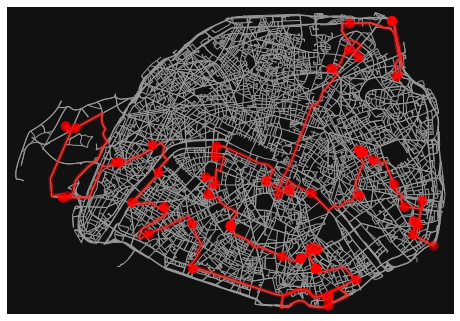

In [37]:
fig, ax = ox.plot_graph_routes(G, circuit, route_color='y', route_linewidth=6, node_size=0)

[*(Retour sommaire)*](#ch0)